In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
import scipy.sparse as sp
import tensorflow as tf
import seaborn as sns 
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
paths = []
lables = []
for dirname, _, filenames in os.walk('C:/new dataset/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        lable = filename.split('_')[-1]
        lable = lable.split('.')[0]
        lables.append(lable.lower())
    if len(paths) == 2800:
        break
print("dataset detected")

dataset detected


In [ ]:
df = pd.DataFrame()
df['speech'] = paths
df['lable'] = lables
df.head()

,speech,lable
0,C:/new dataset/TESS Toronto emotional speech s...,angry
1,C:/new dataset/TESS Toronto emotional speech s...,angry
2,C:/new dataset/TESS Toronto emotional speech s...,angry
3,C:/new dataset/TESS Toronto emotional speech s...,angry
4,C:/new dataset/TESS Toronto emotional speech s...,angry


In [ ]:
df['lable'].value_counts()

lable
angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: count, dtype: int64

<Axes: xlabel='lable', ylabel='count'>

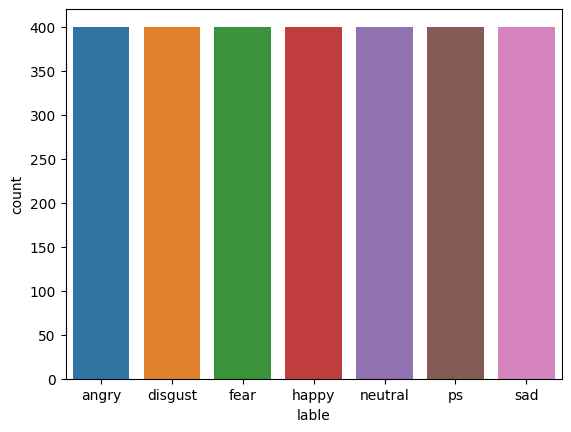

In [ ]:
sns.countplot(x=df['lable'])

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    # librosa.display.waveplot(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

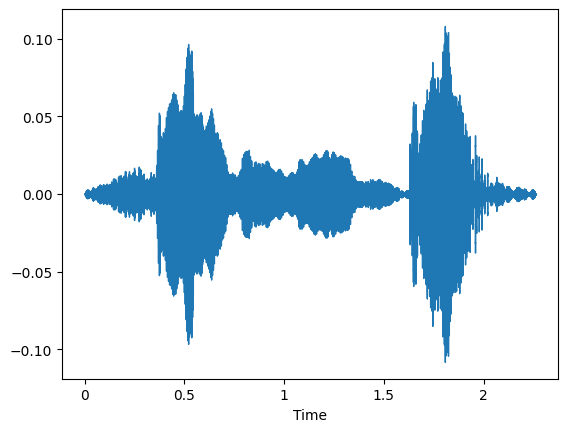

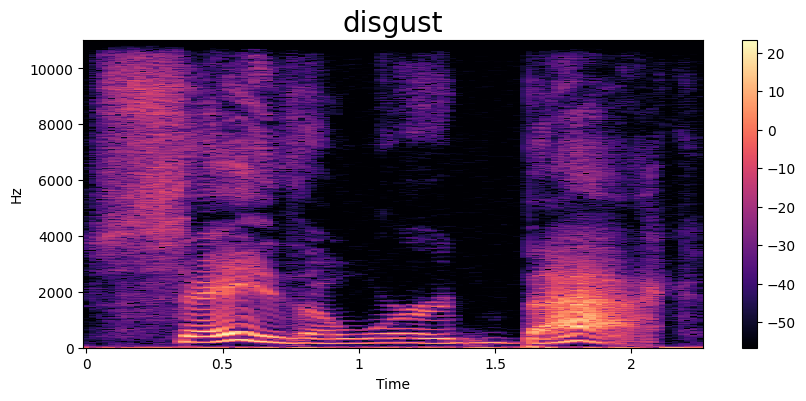

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275506e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228361e+00, -5.57365894e-01, -1.83255327e+00,  2.02101514e-01,
        7.27550924e-01,  1.31773770e+00,  2.88633752e+00,  2.85579133e+00,
       -4.71292162e+00, -4.43651056e+00, -1.62115920e+00, -1.02398405e+01,
       -7.55126286e+00, -1.79688025e+00, -7.03765202e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169895e+01,  2.03489265e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722492e-01,  5.11131430e+00,
        9.56873894e+00,  5.45486784e+00,  2.50996351e+00, -1.82390726e+00,
        4.86896276e+00,  9.31392288e+00,  2.08915019e+00, -1.90649128e+00],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.6560087, -32.74544, -...
2       [-429.79196, 46.124, 1.5550478, -0.2170951, 2....
3       [-403.46118, 76.32369, -12.531774, -22.288858,...
4       [-434.05756, 77.4455, 10.865499, 16.092943, 8....
                              ...                        
2795    [-406.48053, 80.379875, 32.462395, 46.579094, ...
2796    [-426.90918, 102.54757, 24.800041, 43.04809, 4...
2797    [-378.50494, 80.91062, 35.30053, 39.74792, -4....
2798    [-434.8618, 89.906364, 28.373262, 39.57707, -2...
2799    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speech, Length: 2800, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['lable']])

In [ ]:
y = y.toarray() 

In [ ]:
y.shape

(2800, 7)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0,2),
    Dense(128 ,activation ='relu'),
    Dropout(0,2),
    Dense(64, activation='relu'),
    Dropout(0,2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 256)               264192    
                                                                 
 dropout_38 (Dropout)        (None, 256)               0         
                                                                 
 dense_69 (Dense)            (None, 128)               32896     
                                                                 
 dropout_39 (Dropout)        (None, 128)               0         
                                                                 
 dense_70 (Dense)            (None, 64)                8256      
                                                                 
 dropout_40 (Dropout)        (None, 64)                0         
                                                                 
 dense_71 (Dense)            (None, 7)               

In [ ]:
histoy = model.fit(X, y, validation_split= 0.2, epochs= 50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 7s 120ms/step - loss: 0.9591 - accuracy: 0.6362 - val_loss: 1.1349 - val_accuracy: 0.6554
Epoch 2/50
35/35 [==============================] - 3s 89ms/step - loss: 0.3805 - accuracy: 0.8536 - val_loss: 1.7029 - val_accuracy: 0.5589
Epoch 3/50
35/35 [==============================] - 3s 86ms/step - loss: 0.2263 - accuracy: 0.9192 - val_loss: 1.9993 - val_accuracy: 0.6036
Epoch 4/50
35/35 [==============================] - 2s 68ms/step - loss: 0.1531 - accuracy: 0.9478 - val_loss: 1.9595 - val_accuracy: 0.4857
Epoch 5/50
35/35 [==============================] - 2s 66ms/step - loss: 0.1012 - accuracy: 0.9616 - val_loss: 2.0498 - val_accuracy: 0.4321
Epoch 6/50
35/35 [==============================] - 2s 67ms/step - loss: 0.0886 - accuracy: 0.9714 - val_loss: 2.1682 - val_accuracy: 0.4607
Epoch 7/50
35/35 [==============================] - 2s 68ms/step - loss: 0.0897 - accuracy: 0.9701 - val_loss: 1.9475 - val_accuracy: 0.5732
Epoch 8/50
3

In [ ]:
epochs = list(range(50))
acc = histoy.histoy['accuracy']
val_acc = histoy.histoy['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [ ]:
loss = histoy.histoy['loss']
val_loss = histoy.histoy['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

NameError: name 'history' is not defined